In [3]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
import sklearn
import sklearn.model_selection
import multiprocessing
from glob import glob
import matplotlib.patches as mpatches

In [4]:
scores = np.load('scores_msmlag10ns_splittica_alleigen.npy')

In [53]:
output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried

max_mean = []
max_mean_fraction = []

for eigenvalues_index in range(eigenvalues_no):
    # test scores

    y_kinetic = []
    y_commute = []
    tic_nos_kinetic = []
    tic_nos_commute = []

    for model in output[1]:
        y_kinetic_ = []
        y_commute_ = []
        tic_nos_kinetic_ = []
        tic_nos_commute_ = []
        if isinstance(model[0], list):
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0][0])
                y_commute_.append(replicate[0][1])
                tic_nos_kinetic_.append(replicate[1][0])
                tic_nos_commute_.append(replicate[1][1])
        else:
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0])
                y_commute_.append(replicate[1])
        y_kinetic.append(np.array(y_kinetic_))
        y_commute.append(np.array(y_commute_))
        if tic_nos_kinetic_:
            tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
        else:
            tic_nos_kinetic.append(None)
        if tic_nos_commute_:
            tic_nos_commute.append(np.max(tic_nos_commute_))
        else:
            tic_nos_commute.append(None)
    
    y = y_kinetic + y_commute

    x = []

    for index, model in enumerate(output[0]):
        if tic_nos_kinetic[index]:
            x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
        else:
            x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
    for index, model in enumerate(output[0]):
        if tic_nos_commute[index]:
            x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
        else:
            x.append(str(('commute', model[0], model[1], model[2], model[3])))

    #order_means = []
    just_means = []
    for index, model in enumerate(x):
        #order_means.append((model, np.mean(y[index])))
        just_means.append(np.mean(y[index]))
    #order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
    #order = [i[0] for i in order_means]
    #order_test = order
    
    max_mean.append(np.max(just_means))
    max_mean_fraction.append(np.max(just_means)/(eigenvalues_index+2))

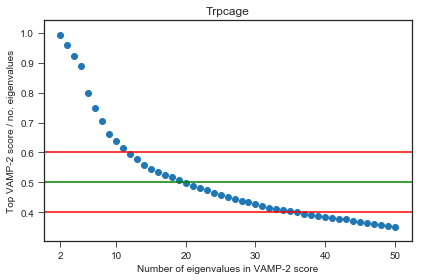

In [54]:
plt.figure()
plt.scatter(np.arange(2,51), max_mean_fraction)
plt.axhline(0.4, c='red')
plt.axhline(0.6, c='red')
plt.axhline(0.5, c='green')
plt.xticks([2,10,20,30,40,50])
plt.xlabel('Number of eigenvalues in VAMP-2 score')
plt.ylabel('Top VAMP-2 score / no. eigenvalues')
plt.title('Trpcage')
plt.tight_layout()
plt.savefig('trpcage_fractions.png', dpi=300)
plt.savefig('trpcage_fractions.pdf')

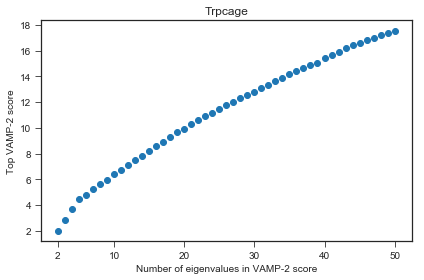

In [55]:
plt.figure()
plt.scatter(np.arange(2,51), max_mean)
plt.xticks([2,10,20,30,40,50])
plt.xlabel('Number of eigenvalues in VAMP-2 score')
plt.ylabel('Top VAMP-2 score')
plt.title('Trpcage')
plt.tight_layout()
plt.savefig('trpcage_means.png', dpi=300)
plt.savefig('trpcage_means.pdf')

In [7]:
# which number of eigenvalues do we pick closest to 50%?

choice = np.argmin(np.abs(np.array(max_mean_fraction) - 0.5)) + 2
print(choice)

20


In [56]:
# which number of eigenvalues do we pick using the iterative algorithm
# algorithm is: start with 10, if score not between 0.4 - 0.6 of the max, multiply or divide top score by 2
# to choose new top

current_choice = 10
current_mean = max_mean[current_choice-2]
current_fraction = max_mean_fraction[current_choice-2]

while (current_fraction < 0.4 or current_fraction > 0.6):
    if current_fraction < 0.4:
        current_choice = int(np.rint(current_mean/2))
    elif current_fraction > 0.6:
        current_choice = int(np.rint(current_mean*2))
        
    if current_choice < 2:
        current_choice = 2
        
    current_mean = max_mean[current_choice-2]
    current_fraction = max_mean_fraction[current_choice-2]
    
print(current_choice)

13


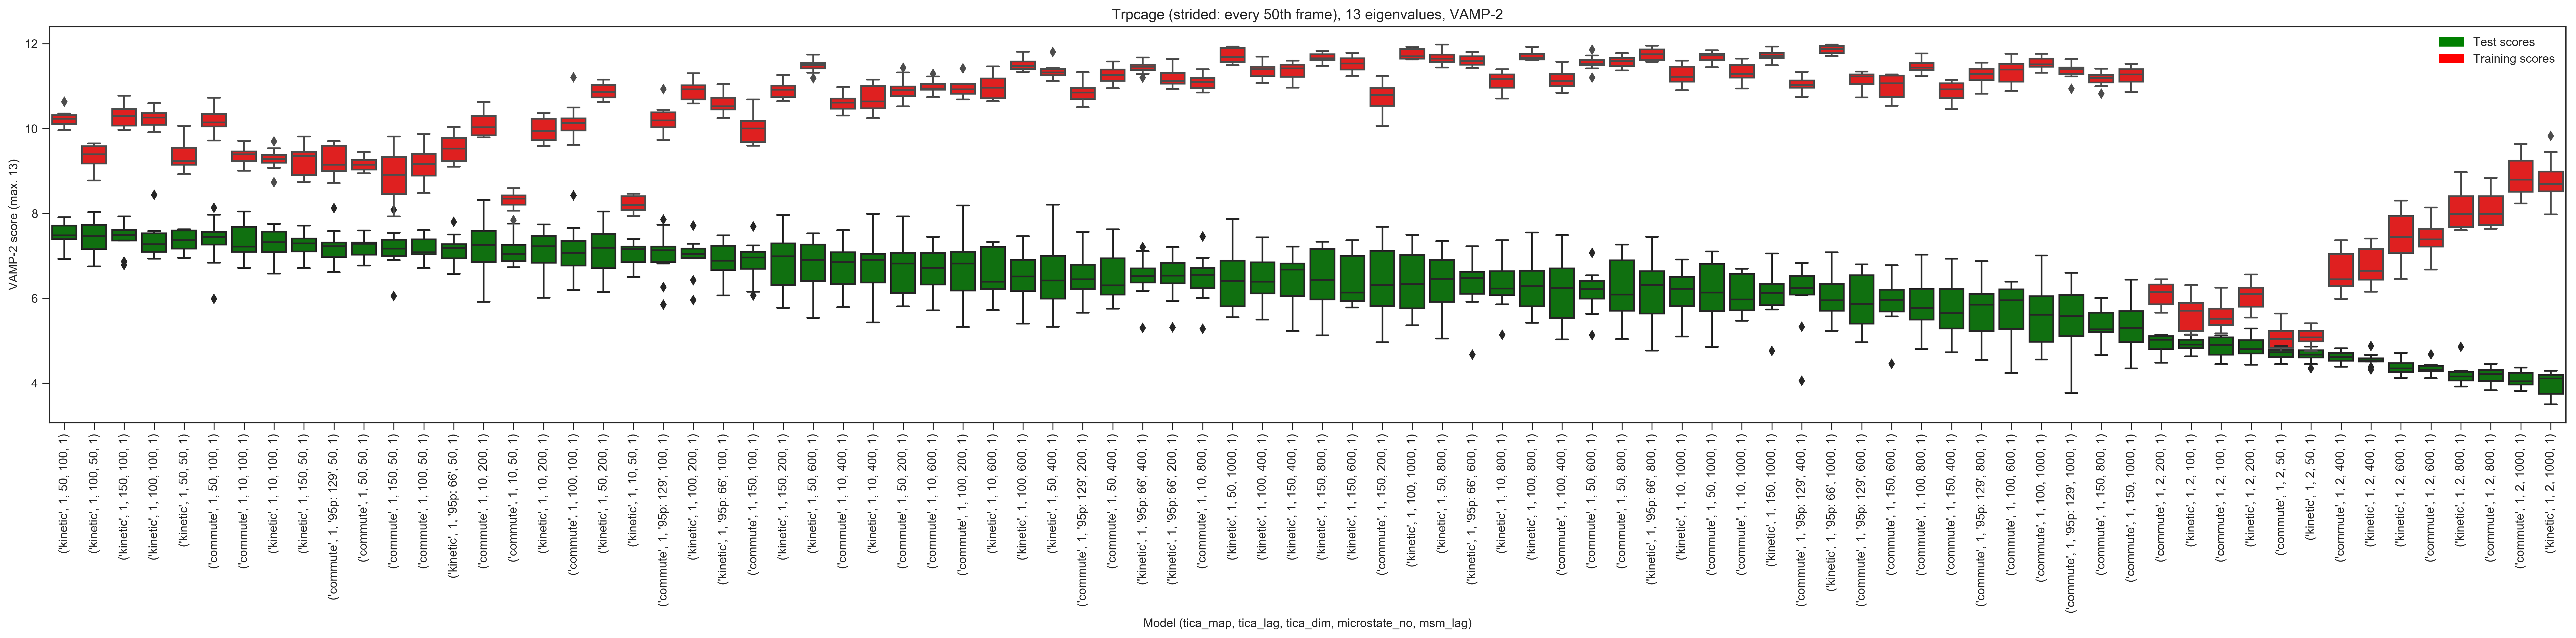

In [57]:
output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
eigenvalues_index = current_choice - 2 # this is actual number of eigenvalues - 2

# test scores

y_kinetic = []
y_commute = []
tic_nos_kinetic = []
tic_nos_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    tic_nos_kinetic_ = []
    tic_nos_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
            tic_nos_kinetic_.append(replicate[1][0])
            tic_nos_commute_.append(replicate[1][1])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    if tic_nos_kinetic_:
        tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
    else:
        tic_nos_kinetic.append(None)
    if tic_nos_commute_:
        tic_nos_commute.append(np.max(tic_nos_commute_))
    else:
        tic_nos_commute.append(None)
    
y = y_kinetic + y_commute

x = []

for index, model in enumerate(output[0]):
    if tic_nos_kinetic[index]:
        x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
    else:
        x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for index, model in enumerate(output[0]):
    if tic_nos_commute[index]:
        x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
    else:
        x.append(str(('commute', model[0], model[1], model[2], model[3])))

order_means = []
just_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
    just_means.append(np.mean(y[index]))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores       

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. %d)' % current_choice)
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('Trpcage (strided: every 50th frame), %d eigenvalues, VAMP-2' % current_choice)
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.png' % current_choice, dpi=300)
plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.pdf' % current_choice)

In [58]:
order_algorithm = np.argsort(just_means)

In [59]:
# choice (i.e. choosing closest to 50% was different so let's plot that too) - and look at rank correlation
# between the two

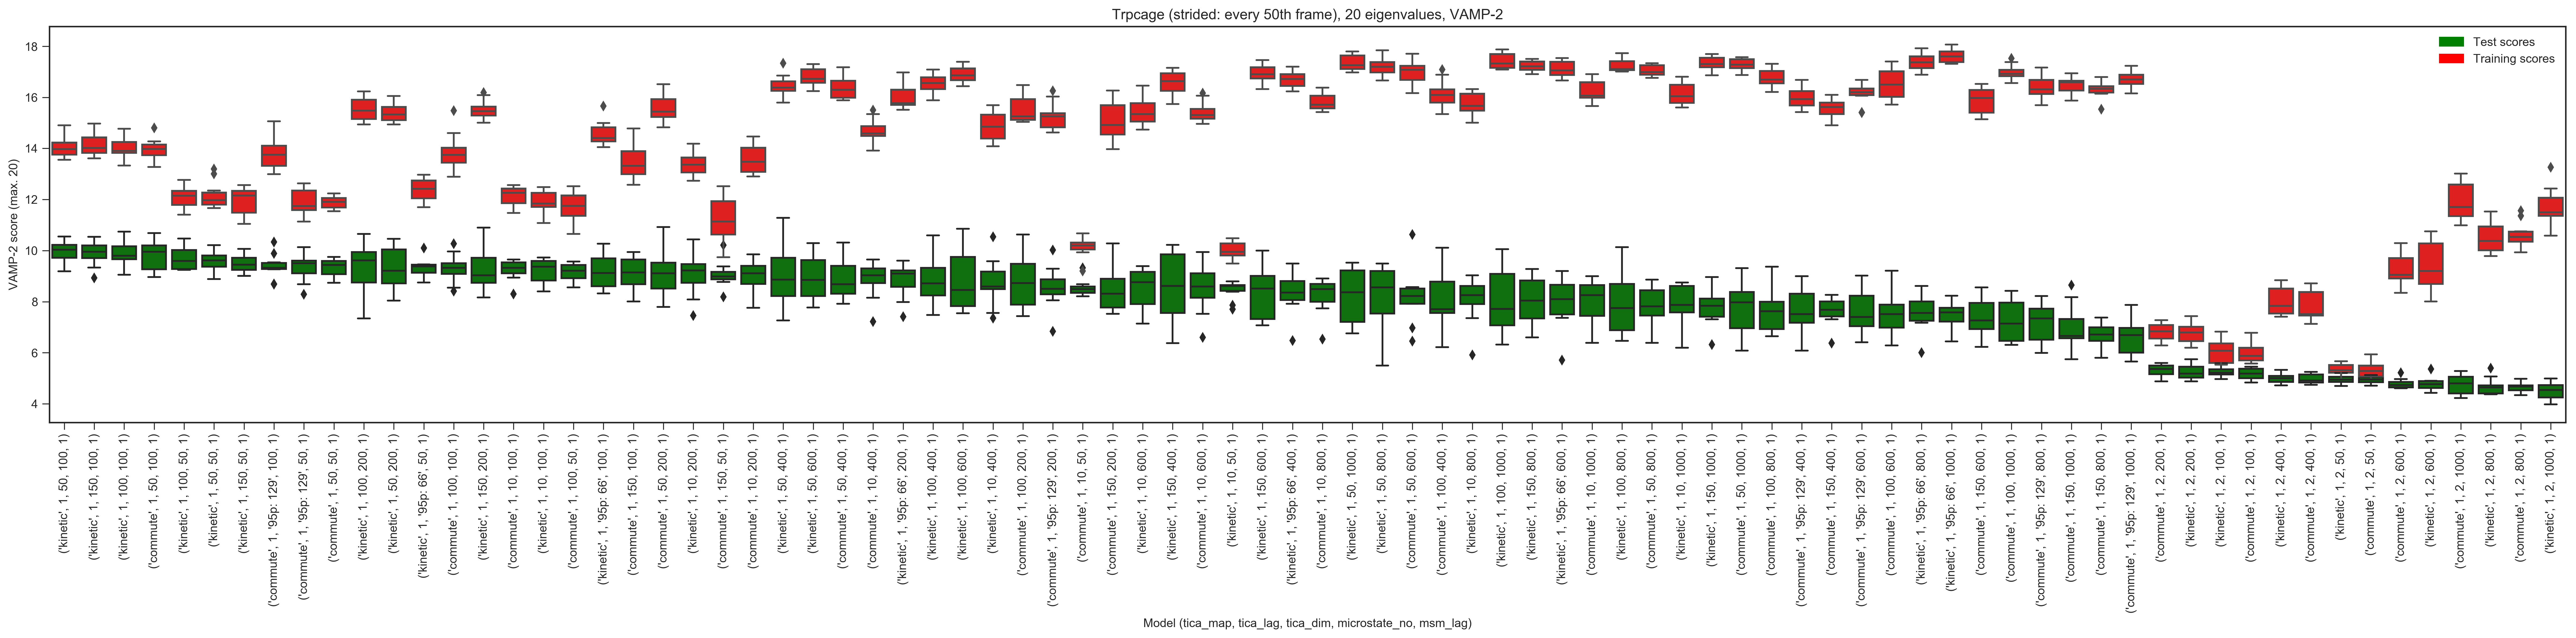

In [60]:
output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
eigenvalues_index = choice - 2 # this is actual number of eigenvalues - 2

# test scores

y_kinetic = []
y_commute = []
tic_nos_kinetic = []
tic_nos_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    tic_nos_kinetic_ = []
    tic_nos_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
            tic_nos_kinetic_.append(replicate[1][0])
            tic_nos_commute_.append(replicate[1][1])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    if tic_nos_kinetic_:
        tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
    else:
        tic_nos_kinetic.append(None)
    if tic_nos_commute_:
        tic_nos_commute.append(np.max(tic_nos_commute_))
    else:
        tic_nos_commute.append(None)
    
y = y_kinetic + y_commute

x = []

for index, model in enumerate(output[0]):
    if tic_nos_kinetic[index]:
        x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
    else:
        x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for index, model in enumerate(output[0]):
    if tic_nos_commute[index]:
        x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
    else:
        x.append(str(('commute', model[0], model[1], model[2], model[3])))

order_means = []
just_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
    just_means.append(np.mean(y[index]))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores       

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. %d)' % choice)
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('Trpcage (strided: every 50th frame), %d eigenvalues, VAMP-2' % choice)
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.png' % choice, dpi=300)
plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.pdf' % choice)

In [61]:
order_closest = np.argsort(just_means)

In [62]:
# rank correlation

In [63]:
import scipy

In [64]:
order_algorithm_translate = np.zeros(len(order_algorithm))

In [65]:
order_closest_translate = np.zeros(len(order_closest))

In [66]:
for order, x in enumerate(order_algorithm):
    order_algorithm_translate[x] = order

In [67]:
for order, x in enumerate(order_closest):
    order_closest_translate[x] = order

In [68]:
scipy.stats.spearmanr(order_algorithm_translate, order_closest_translate)

SpearmanrResult(correlation=0.97183355269818761, pvalue=3.0514691411800546e-53)

In [1]:
# also look at scores for just 2 eigenvalues - i.e. folding only

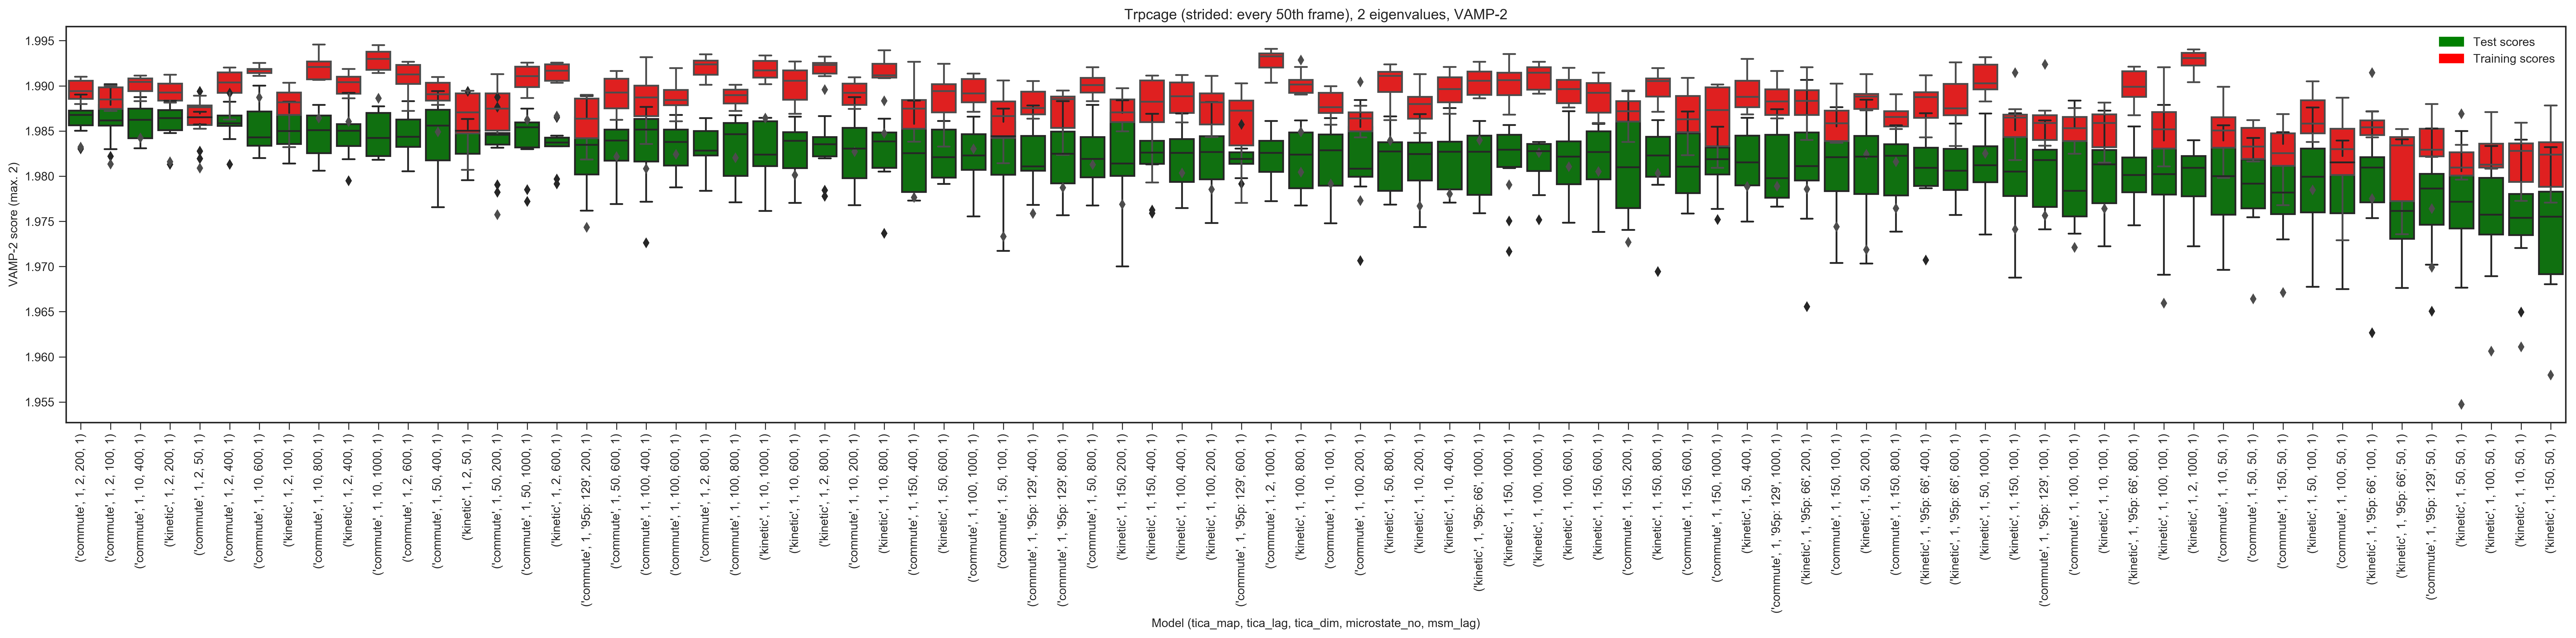

In [5]:
choice = 2

output = scores
eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
eigenvalues_index = choice - 2 # this is actual number of eigenvalues - 2

# test scores

y_kinetic = []
y_commute = []
tic_nos_kinetic = []
tic_nos_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    tic_nos_kinetic_ = []
    tic_nos_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
            tic_nos_kinetic_.append(replicate[1][0])
            tic_nos_commute_.append(replicate[1][1])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    if tic_nos_kinetic_:
        tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
    else:
        tic_nos_kinetic.append(None)
    if tic_nos_commute_:
        tic_nos_commute.append(np.max(tic_nos_commute_))
    else:
        tic_nos_commute.append(None)
    
y = y_kinetic + y_commute

x = []

for index, model in enumerate(output[0]):
    if tic_nos_kinetic[index]:
        x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
    else:
        x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for index, model in enumerate(output[0]):
    if tic_nos_commute[index]:
        x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
    else:
        x.append(str(('commute', model[0], model[1], model[2], model[3])))

order_means = []
just_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
    just_means.append(np.mean(y[index]))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores       

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[eigenvalues_index::eigenvalues_no]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. %d)' % choice)
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('Trpcage (strided: every 50th frame), %d eigenvalues, VAMP-2' % choice)
plt.tight_layout()

plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.png' % choice, dpi=300)
plt.savefig('trpcage_msmlag10ns_%deigen_vamp2.pdf' % choice)